In [1]:
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import glob
from PIL import Image
from PIL import ImageOps
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2022-04-12 15:11:03.098946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-12 15:11:03.098988: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.getcwd()

'/storage/work/n/nxt5197/589_Machine_Learning'

In [3]:
f3_plots = sorted(glob.glob('/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/f3_plots/*.png'))
len(f3_plots)

811

In [4]:
f = f3_plots[0]

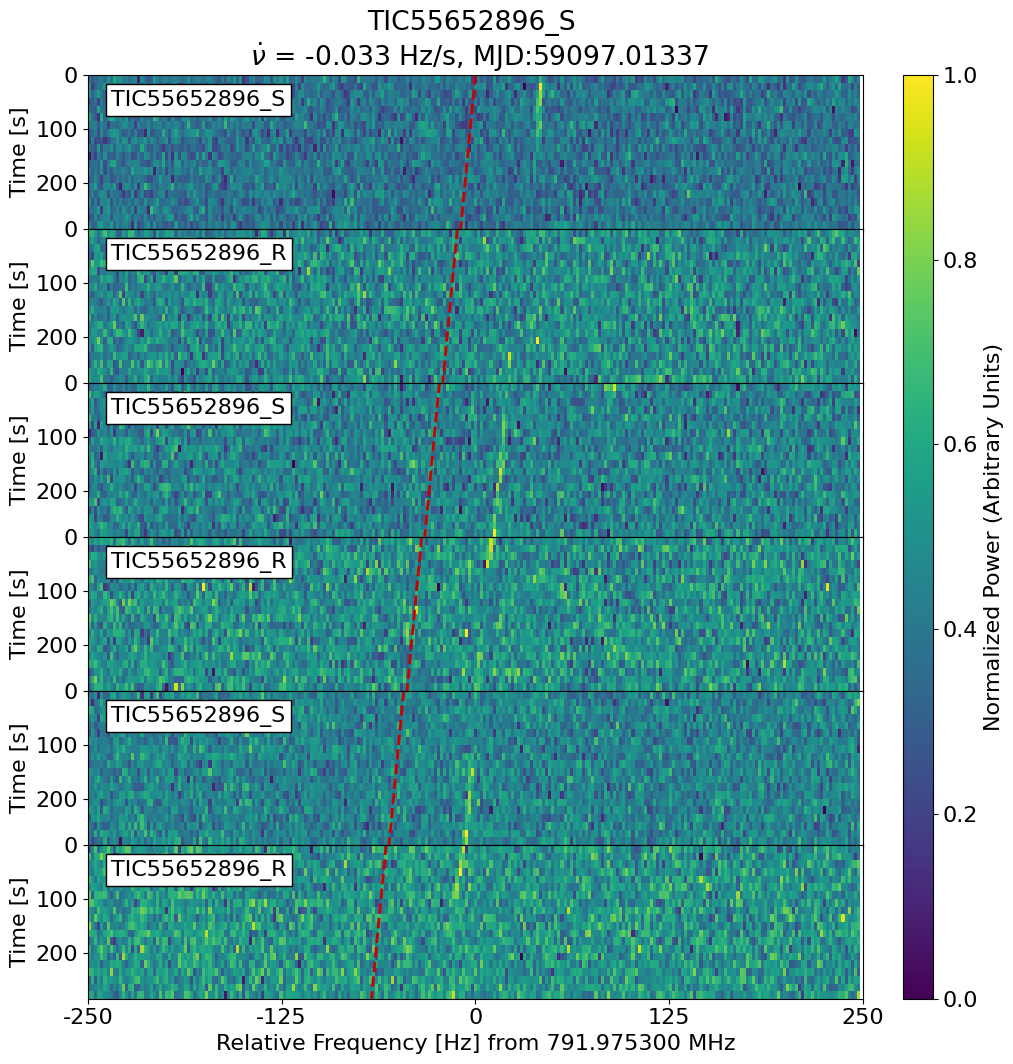

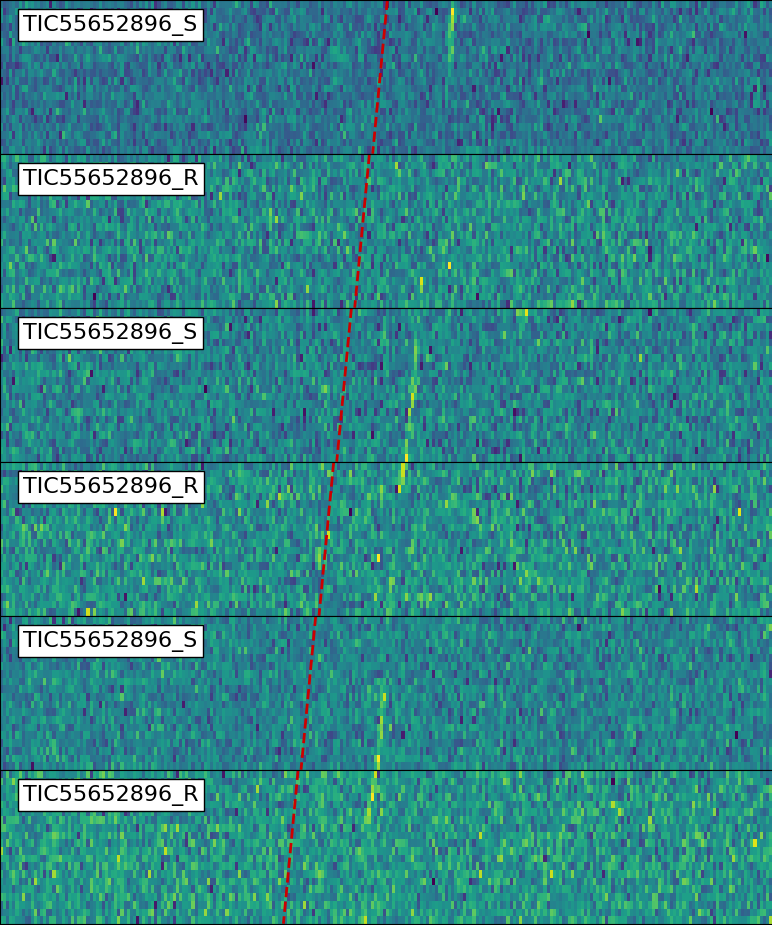

In [5]:
border = (88, 75, 153, 64) # left, top, right, bottom
img = Image.open(f)
img.show()
ImageOps.crop(img, border)

In [6]:
border = (88, 75, 153, 64) # left, top, right, bottom
img = Image.open(f3_plots[420])
# image.show()
cropped_img = ImageOps.crop(img, border)

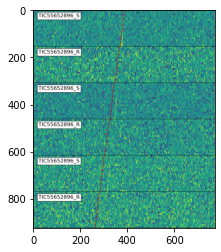

In [7]:
plt.imshow(cropped_img)

In [8]:
cropped_imgs = [0 for i in range(len(f3_plots))] 
for i,f in enumerate(f3_plots):
    border = (88, 75, 153, 64) # left, top, right, bottom
    img = Image.open(f)
    # image.show()
    cropped_imgs[i] = ImageOps.crop(img, border)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [10]:
np.asarray(cropped_imgs[0]).shape

(925, 772, 4)

In [52]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
autoencoder.compile(optimizer=my_optimizer, loss=losses.MeanSquaredError(),metrics=['accuracy'])

In [53]:
x_train = cropped_imgs[:139]+cropped_imgs[196:600]
x_test = cropped_imgs[600:]
x_train = [np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))]
x_test = [np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))]
shapes_train = [np.shape(x_train[i]) for i in range(len(x_train))]
shapes_test = [np.shape(x_test[i]) for i in range(len(x_test))]
set(shapes_train),set(shapes_test)

({(925, 772)}, {(925, 772)})

In [13]:
shapes_train.count((925, 772)),shapes_train.count((925, 819))

(543, 0)

In [14]:
np.shape(x_train),np.shape(x_test)

((543, 925, 772), (211, 925, 772))

In [57]:
x_train = cropped_imgs[:139]+cropped_imgs[196:600]
x_test = cropped_imgs[600:]
x_train = [np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))]
x_test = [np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))]

x_train = np.array(x_train)[:,::34,::28]
x_test = np.array(x_test)[:,::34,::28]

autoencoder.fit(x_train, x_train,
                epochs=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.1468 - val_loss: 0.0049 - val_accuracy: 0.1518
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.1473 - val_loss: 0.0049 - val_accuracy: 0.1527
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.1476 - val_loss: 0.0049 - val_accuracy: 0.1523
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.1471 - val_loss: 0.0049 - val_accuracy: 0.1530
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.1465 - val_loss: 0.0049 - val_accuracy: 0.1515
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.1470 - val_loss: 0.0049 - val_accuracy: 0.1523
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.1478 - val_loss: 0.0048 - val_accuracy: 0.1522
Epoch 

In [58]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [50]:
np.shape(encoded_imgs)

(211, 64)

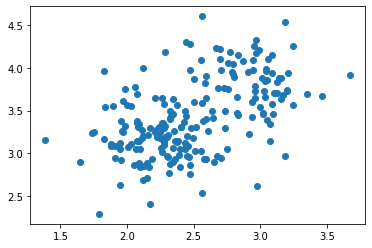

In [59]:
plt.plot(encoded_imgs[:,2],encoded_imgs[:,3],'o')

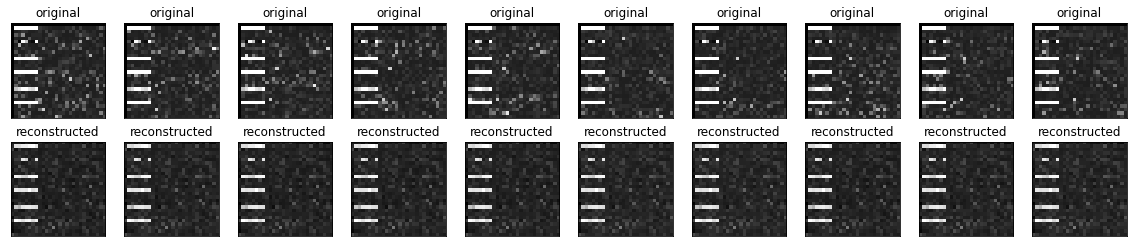

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
x_train = cropped_imgs[:139]+cropped_imgs[196:600]
x_test = cropped_imgs[600:]
x_train = np.array([np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))])
x_test = np.array([np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))])
print(np.shape(x_train),np.shape(x_test))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(np.shape(x_train),np.shape(x_test))

(543, 925, 772) (211, 925, 772)
(543, 714100) (211, 714100)


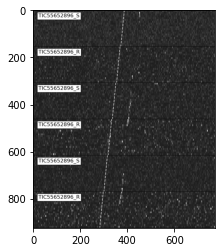

In [19]:
plt.imshow(x_train[0].reshape(925,772))

In [20]:


# latent_dim = 64 

# class Autoencoder(Model):
#   def __init__(self, latent_dim):
#     super(Autoencoder, self).__init__()
#     self.latent_dim = latent_dim   
#     self.encoder = tf.keras.Sequential([
#       layers.Flatten(),
#       layers.Dense(latent_dim, activation='relu'),
#     ])
#     self.decoder = tf.keras.Sequential([
#       layers.Dense(714100, activation='sigmoid'),
#       layers.Reshape((925, 772))
#     ])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# autoencoder = Autoencoder(latent_dim)

# my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
# autoencoder.compile(optimizer=my_optimizer, loss=losses.MeanSquaredError())

# autoencoder.fit(x_train, x_train,
#                 epochs=10,
#                 batch_size=1,
#                 validation_data=(x_test, x_test))

In [21]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(714100,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(714100, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

my_optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
autoencoder.compile(optimizer=my_optimizer, loss='binary_crossentropy',metrics=['accuracy'])

x_train = cropped_imgs[:139]+cropped_imgs[196:600]
x_test = cropped_imgs[600:]
x_train = np.array([np.array(np.asarray(x_train[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_train))])
x_test = np.array([np.array(np.asarray(x_test[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_test))])
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 0.6931 - accuracy: 0.0000e+00 - val_loss: 0.6928 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 8s 2s/step - loss: 0.6920 - accuracy: 0.0000e+00 - val_loss: 0.6829 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 9s 2s/step - loss: 0.6771 - accuracy: 0.0000e+00 - val_loss: 0.6392 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.6266 - accuracy: 0.0000e+00 - val_loss: 0.5603 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 8s 2s/step - loss: 0.5512 - accuracy: 0.0000e+00 - val_loss: 0.4926 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 8s 2s/step - loss: 0.5042 - accuracy: 0.0000e+00 - val_loss: 0.4721 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.4969 - accuracy: 0.0000e+00 - val_loss: 0.4565 - val_accura

In [24]:
# encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 32), found shape=(211, 64)

In [ ]:
# original_dim = 925 * 772
# intermediate_dim = 64
# latent_dim = 2

# inputs = keras.Input(shape=(original_dim,))
# h = layers.Dense(intermediate_dim, activation='relu')(inputs)
# z_mean = layers.Dense(latent_dim)(h)
# z_log_sigma = layers.Dense(latent_dim)(h)

# from keras import backend as K

# def sampling(args):
#     z_mean, z_log_sigma = args
#     epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
#                               mean=0., stddev=0.1)
#     return z_mean + K.exp(z_log_sigma) * epsilon

# z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# # Create encoder
# encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# # Create decoder
# latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
# x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
# outputs = layers.Dense(original_dim, activation='sigmoid')(x)
# decoder = keras.Model(latent_inputs, outputs, name='decoder')

# # instantiate VAE model
# outputs = decoder(encoder(inputs)[2])
# vae = keras.Model(inputs, outputs, name='vae_mlp')

# reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
# reconstruction_loss *= original_dim
# kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
# kl_loss = K.sum(kl_loss, axis=-1)
# kl_loss *= -0.5
# vae_loss = K.mean(reconstruction_loss + kl_loss)
# vae.add_loss(vae_loss)
# vae.compile(optimizer='adam')

# vae.fit(x_train, x_train,
#         epochs=10,
#         batch_size=32,
#         validation_data=(x_test, x_test))

# y_test = cmap[-len(x_test):]
# batch_size=32
# x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
# plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
# plt.colorbar()
# # plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
# plt.show()

In [ ]:
# y_test = cmap[-len(x_test):]
# batch_size=32
# x_test_encoded,_,_ = encoder.predict(x_test, batch_size=batch_size)
# plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
# plt.colorbar()
# # plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
# plt.show()

In [ ]:
# x_test_encoded[:,0]

# PCA, t-SNE, DBSCAN

In [25]:
import os
import glob
import numpy as np

# To run PCA, t-SNE, and DBSCAN algorithms
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


from PIL import Image
from PIL import ImageOps

In [26]:
f3_plots = sorted(glob.glob('/storage/home/nxt5197/work/PPO/TOI-216/node_by_node/f3_plots/*.png'))

cropped_imgs = [0 for i in range(len(f3_plots))] 
for i,f in enumerate(f3_plots):
    border = (88, 75, 153, 64) # left, top, right, bottom
    img = Image.open(f)
    # image.show()
    cropped_imgs[i] = ImageOps.crop(img, border)

x_all = cropped_imgs[:139]+cropped_imgs[196:]
x_all = np.array([np.array(np.asarray(x_all[i]).astype('float32')/255.)[:,:,0] for i in range(len(x_all))])
print(np.shape(x_all))
x_all = x_all.reshape((len(x_all), np.prod(x_all.shape[1:])))
print(np.shape(x_all))

(754, 925, 772)
(754, 714100)


### PCA

[0.0980084  0.05393342]
2 components account for 15.2% of the total explained variance.


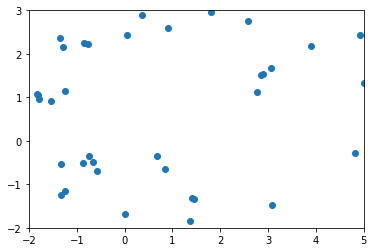

In [27]:
n_components = 2 # Change to see how it affects the total explained variance!

pca = PCA(n_components=n_components)
pca.fit(x_all)
y_space_pca = pca.transform(x_all)

print(pca.explained_variance_ratio_)
print("%d components account for %.01f%% of the total explained variance." % (n_components, \
                                                                              (sum(pca.explained_variance_ratio_)*100.)))
plt.scatter(y_space_pca[:,0], y_space_pca[:,1])
plt.xlim((-2, 5))
plt.ylim((-2, 3)) # feel free to unsnip box to see the far outliers
plt.show()

### t-SNE

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 754 samples in 0.474s...
[t-SNE] Computed neighbors for 754 samples in 40.369s...
[t-SNE] Computed conditional probabilities for sample 754 / 754
[t-SNE] Mean sigma: 13.089934
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 79.3817596, gradient norm = 0.3972336 (50 iterations in 0.255s)
[t-SNE] Iteration 100: error = 78.1252823, gradient norm = 0.5218496 (50 iterations in 0.207s)
[t-SNE] Iteration 150: error = 81.0088425, gradient norm = 0.4199589 (50 iterations in 0.205s)
[t-SNE] Iteration 200: error = 74.8640823, gradient norm = 0.4387775 (50 iterations in 0.210s)
[t-SNE] Iteration 250: error = 75.5620880, gradient norm = 0.5757432 (50 iterations in 0.206s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.562088
[t-SNE] Iteration 300: error = 1.7292448, gradient norm = 0.0098853 (50 iterations in 0.249s)
[t-SNE] Iteration 350: error = 1.4880698, gradient norm = 0.0027430

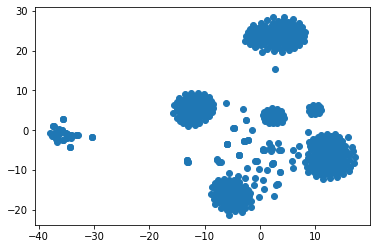

In [28]:
perplexity = 15

model = TSNE(n_components=2, learning_rate="auto", perplexity=perplexity, verbose=2, init="random", random_state=1, n_iter=1000)
y_space = model.fit_transform(x_all)
x_vals = [x[0] for x in y_space]
y_vals = [x[1] for x in y_space]
plt.scatter(x_vals, y_vals)
plt.show()

### DBSCAN

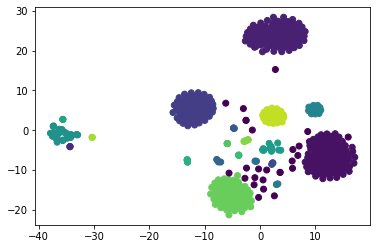

In [72]:
clustering = DBSCAN(eps=1.5, min_samples=3).fit(np.array(y_space)) #clustering depends heavily on epsilon and min_samples!
cluster_idx = clustering.labels_
colors = np.array(["r", "g", "b", "m", "k","y","gray"])
cmap = colors[cluster_idx % 7]
plt.scatter(x_vals, y_vals,c=clustering.labels_,vmin=-1,vmax=21,cmap='viridis')#, 50, list(cmap))
plt.show()

In [64]:
clustering.labels_

array([ 0,  0, 17,  1,  1,  1,  2,  3, -1,  4,  5,  5,  6, -1,  6, -1,  6,
        7, -1,  8,  9,  9, 10,  9,  4, -1, -1, 10, 11, 10, -1, -1, -1, -1,
        7, -1, -1, -1, 10, 11, -1, 11, 10, 10, 10, 12, 12, 12, -1,  5, 11,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15,  2,
        2,  2,  2, 16, -1, 16, 17, 16, -1, -1, -1, 18, 18, 18,  3,  3,  3,
       -1, 11, 11, 18, 18, 18, -1,  3, -1, 19, 19, 19, 10, 10, 10, 10, 10,
       10, 11, 18, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19,  4,  4, -1,
        5,  5,  7, -1, -1, 20, 20, 20, 10, 10, 10, 21, 21, 21,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 17, 17, -1, -1, 17, 17, 17, 17, 16, 17, 17, 16, 17,
       -1, 16, -1, -1, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        0,  0,  0, -1,  8, -1,  0,  8,  0,  0,  8,  8,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

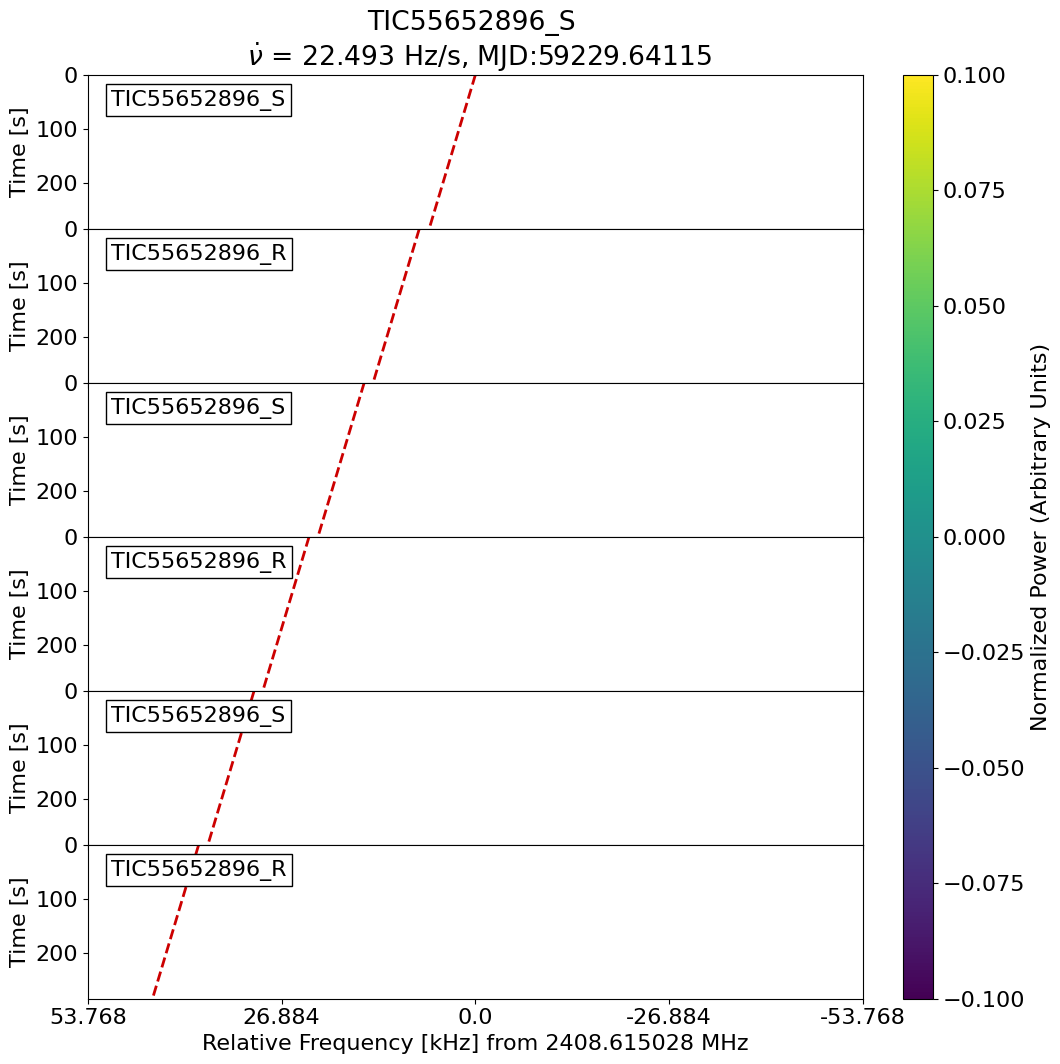

In [47]:
f = f3_plots[np.where(cmap=='m')[0][20]]
img = Image.open(f)
img.show()

In [31]:
cmap

array(['r', 'r', 'g', 'b', 'b', 'b', 'm', 'r', 'k', 'k', 'r', 'r', 'r',
       'r', 'r', 'm', 'r', 'r', 'k', 'g', 'b', 'b', 'b', 'b', 'k', 'r',
       'r', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b',
       'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'm', 'm', 'm', 'm', 'k', 'k', 'k',
       'k', 'k', 'm', 'm', 'm', 'm', 'r', 'r', 'r', 'g', 'r', 'g', 'r',
       'k', 'k', 'k', 'k', 'r', 'r', 'r', 'r', 'r', 'r', 'k', 'k', 'k',
       'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r',
       'k', 'k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'r', 'r', 'r', 'k', 'k', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b',
       'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'g', 'g', 'g

In [ ]:
original_dim = 925 * 772
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, x_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, x_test))

y_test = cmap[-len(x_test):]
batch_size=32
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
# plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
plt.show()

Epoch 1/10
17/17 [==============================] - 13s 680ms/step - loss: nan - val_loss: nan
Epoch 2/10
17/17 [==============================] - 11s 643ms/step - loss: nan - val_loss: nan
Epoch 3/10
17/17 [==============================] - 12s 689ms/step - loss: nan - val_loss: nan
Epoch 4/10
17/17 [==============================] - 11s 668ms/step - loss: nan - val_loss: nan
Epoch 5/10
17/17 [==============================] - 11s 638ms/step - loss: nan - val_loss: nan
Epoch 6/10
17/17 [==============================] - 11s 632ms/step - loss: nan - val_loss: nan
Epoch 7/10
17/17 [==============================] - 11s 629ms/step - loss: nan - val_loss: nan
Epoch 8/10
17/17 [==============================] - 10s 617ms/step - loss: nan - val_loss: nan
Epoch 9/10
17/17 [==============================] - 11s 624ms/step - loss: nan - val_loss: nan
Epoch 10/10
17/17 [==============================] - 11s 630ms/step - loss: nan - val_loss: nan


TypeError: list indices must be integers or slices, not tuple

<Figure size 432x432 with 0 Axes>

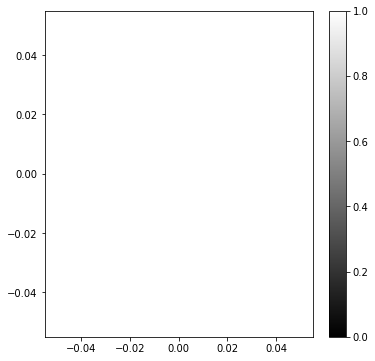

In [ ]:
y_test = cmap[-len(x_test):]
batch_size=32
x_test_encoded,_,_ = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
# plt.savefig('/storage/home/nxt5197/work/589_Machine_Learning/plots/VAE_test.pdf',format='pdf')
plt.show()